PROBLEM STATEMENT-1

Clustering:

Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 

The Data Dictionary and the detailed description of the formulas for CPM, CPC and CTR are given in the sheet 2 of the Clustering Clean ads_data Excel File. 

In [1]:
# importing the necessary files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [3]:
df=pd.read_excel('Clustering Clean Ads_Data.xlsx')

In [4]:
df.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [5]:
df.tail(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [6]:
df.shape

(23066, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

Here we can see that there are some missing values in CTR,CPM and CPC column.

## Checking Summary Statistic

In [8]:
df.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,18330.000000,18330.000000,18330.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.073661,7.672045,0.351061
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.075160,6.481391,0.343334
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002600,1.710000,0.090000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.082550,7.660000,0.160000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.130000,12.510000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


## Checking of null values

In [9]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

Here we can see that there are null values present in CTR, CPM and CPC columns in the dataset.

## Checking for Duplicates

In [10]:
df.duplicated().sum()

0

There are no duplicates in the dataset.

In [11]:
# dropping the columns not required further
df_digital=df.drop(['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format'], axis=1)

In [12]:
df_digital.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,300,250,75000,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,300,250,75000,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,300,250,75000,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,300,250,75000,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


## Treat missing values in CPC, CTR and CPM using the formula given. You have to basically create an user defined function and then call the function for imputing. 

In [13]:
# here we have treated the missing values with the formula given

df_digital.CPM.fillna((df_digital.Spend/df_digital.Impressions)*1000, inplace = True)
df_digital.CPC.fillna((df_digital.Spend/df_digital.Clicks), inplace = True)
df_digital.CTR.fillna((df_digital.Clicks/df_digital.Impressions)*100, inplace = True)

In [14]:
# checking whether missing values treated
df_digital.isnull().sum()

Ad - Length              0
Ad- Width                0
Ad Size                  0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

## Check if there are any outliers.

In [15]:
df_digital.head(5)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,300,250,75000,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,300,250,75000,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,300,250,75000,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,300,250,75000,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [16]:
# checking the number of features
len(df_digital.columns)

13

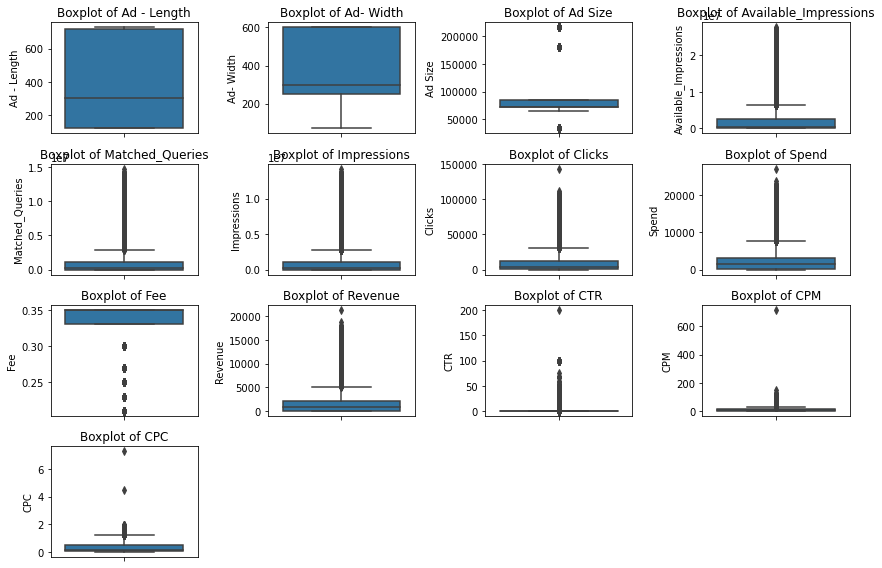

In [17]:
# checking the presense of outliers in each feature
plt.figure(figsize=(12,8))
feature_list=df_digital.columns
for i in range (len(feature_list)):
    plt.subplot(4,4, i+1)
    sns.boxplot(y=df_digital[feature_list[i]], data=df_digital)
    plt.title('Boxplot of {}'. format (feature_list[i]))
    plt.tight_layout()

We can see that there are outliers present in the dataset

## Treatment of outliers

In [18]:
# define a function which returns the upper and lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [19]:
# Cap and floor the values beyond the outlier boundries
for i in feature_list:
    LL,UL = remove_outlier(df_digital[i])
    df_digital[i] = np.where(df_digital[i]>UL, UL, df_digital[i])
    df_digital[i] = np.where(df_digital[i]<LL, LL, df_digital[i])

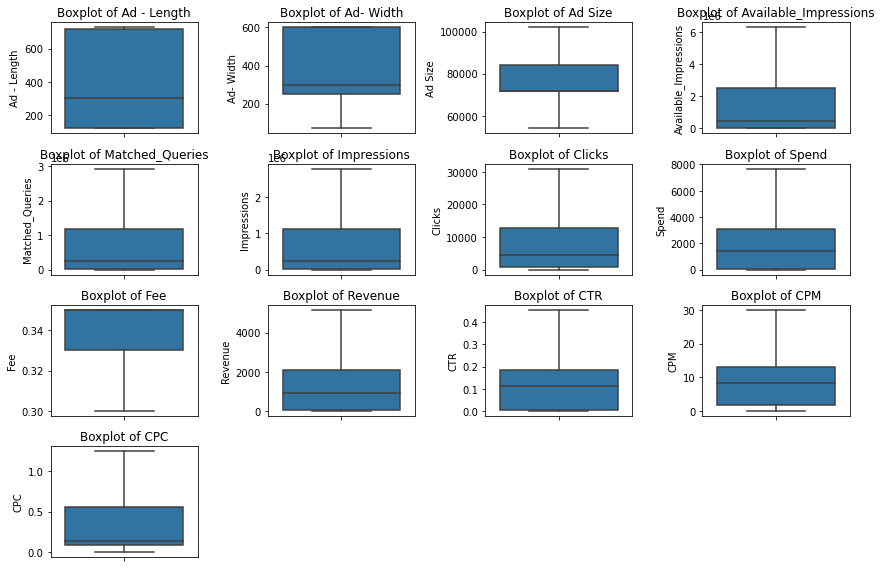

In [20]:
# Check to verify if outliers have been treated
plt.figure(figsize=(12,8))
feature_list = df_digital.columns
for i in range (len(feature_list)):
    plt.subplot(4,4, i+1)
    sns.boxplot(y=df_digital[feature_list[i]], data=df_digital)
    plt.title('Boxplot of {}'. format (feature_list[i]))
    plt.tight_layout() 

## Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [21]:
df_digital.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.0031,0.0,0.0
1,300.0,250.0,75000.0,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.0035,0.0,0.0
2,300.0,250.0,75000.0,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.0028,0.0,0.0
3,300.0,250.0,75000.0,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.0020,0.0,0.0
4,300.0,250.0,75000.0,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.0041,0.0,0.0


In [22]:
# scaling the data using zscore

from scipy.stats import zscore
df_digital_scaled = df_digital.apply(zscore)

In [23]:
df_digital_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.535724,-0.880093,-0.891201,-1.194562,-1.04114
1,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.535724,-0.880093,-0.888615,-1.194562,-1.04114
2,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.535724,-0.880093,-0.893142,-1.194562,-1.04114
3,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.535724,-0.880093,-0.898315,-1.194562,-1.04114
4,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.535724,-0.880093,-0.884734,-1.194562,-1.04114


## Perform clustering and do the following:

# Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
wardlink=linkage(df_digital, method='ward')

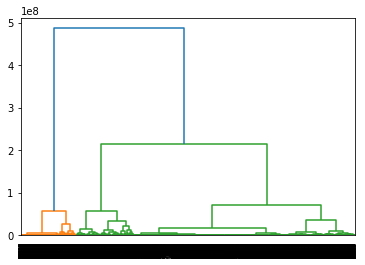

In [26]:
dend=dendrogram(wardlink)

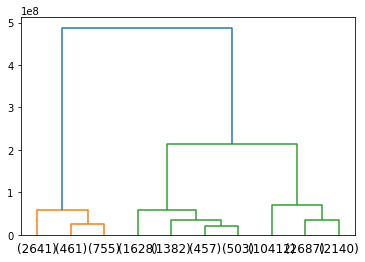

In [27]:
dend=dendrogram(wardlink,
               truncate_mode='lastp',
               p=10,
               )

In [28]:
 from scipy.cluster.hierarchy import fcluster

In [29]:
clusters=fcluster(wardlink, 3, criterion='maxclust')
clusters

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [30]:
df_digital_scaled['clusters']=clusters

In [31]:
df_digital_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.535724,-0.880093,-0.891201,-1.194562,-1.04114,3
1,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.535724,-0.880093,-0.888615,-1.194562,-1.04114,3
2,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.535724,-0.880093,-0.893142,-1.194562,-1.04114,3
3,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.535724,-0.880093,-0.898315,-1.194562,-1.04114,3
4,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.535724,-0.880093,-0.884734,-1.194562,-1.04114,3


## Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

In [32]:
from sklearn.cluster import KMeans

In [33]:
# forming 2 clusters k=2
k_means=KMeans(n_clusters=2, random_state=4)

In [34]:
k_means.fit(df_digital_scaled)

KMeans(n_clusters=2, random_state=4)

In [35]:
k_means.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
# within sum of squares
k_means.inertia_

193503.8833082997

k_means.inertia is nothing but the within sum of squares when k=2

# Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [37]:
k_means=KMeans(n_clusters=1, random_state=4)
k_means.fit(df_digital_scaled)
k_means.inertia_

313337.5114887714

In [38]:
k_means=KMeans(n_clusters=3, random_state=4)
k_means.fit(df_digital_scaled)
k_means.inertia_

143009.0341216927

In [39]:
k_means=KMeans(n_clusters=4, random_state=4)
k_means.fit(df_digital_scaled)
k_means.inertia_

107093.5970449873

In [40]:
k_means=KMeans(n_clusters=5, random_state=4)
k_means.fit(df_digital_scaled)
k_means.inertia_

73900.21941165352

In [41]:
k_means=KMeans(n_clusters=6, random_state=4)
k_means.fit(df_digital_scaled)
k_means.inertia_

64073.858991168425

wss reduces as k keeps on increasing

# Calculating WSS for other values of K - Elbow Method

In [42]:
 wss=[]

In [43]:
for i in range(1,11):
    KM = KMeans(n_clusters=i, random_state=4)
    KM.fit(df_digital_scaled)
    wss.append(KM.inertia_)

In [44]:
wss

[313337.5114887714,
 193503.8833082997,
 143009.0341216927,
 107093.59704498731,
 73900.21941165352,
 64073.858991168425,
 56861.13670395194,
 51368.481285020054,
 46621.84747601212,
 43211.3043409518]

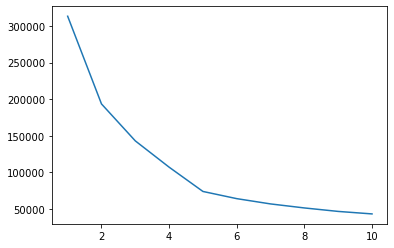

In [45]:
plt.plot(range(1,11), wss)

C:\Users\BARKHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

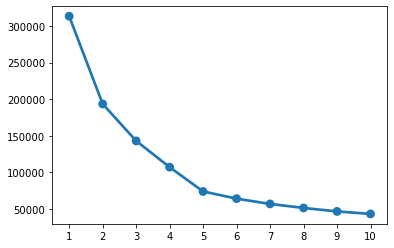

In [46]:
import seaborn as sns
a=[1,2,3,4,5,6,7,8,9,10]

sns.pointplot(a, wss)

# Cluster evaluation for 3 clusters: the silhouette score

In [47]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [48]:
k_means=KMeans(n_clusters=3, random_state=4)
k_means.fit(df_digital_scaled)
labels = k_means.labels_

In [49]:
# Calculating silhouette_score

silhouette_score(df_digital_scaled,labels)

0.34767473617048006

## KMeans with K=4

In [50]:
k_means=KMeans(n_clusters=4, random_state=4)
k_means.fit(df_digital_scaled)
labels = k_means.labels_

# Cluster evaluation for 4 clusters

In [51]:
#from sklearn.metrics import silhouette_samples, silhouette_score

In [52]:
silhouette_score(df_digital_scaled,labels)

0.4068837613500353

silhouette score is better for 4 clusters than for 3 clusters. So, final clusters will be 4

Appending Clusters to the original dataset

In [53]:
df_digital['clus_kmeans4']=labels
df_digital.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clus_kmeans4
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.0031,0.0,0.0,2
1,300.0,250.0,75000.0,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.0035,0.0,0.0,2
2,300.0,250.0,75000.0,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.0028,0.0,0.0,2
3,300.0,250.0,75000.0,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.0020,0.0,0.0,2
4,300.0,250.0,75000.0,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.0041,0.0,0.0,2


## Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [54]:
from sklearn.metrics import silhouette_score

In [55]:
for n_cluster in range(2, 11):

    kmeans = KMeans(n_clusters=n_cluster).fit(df_digital_scaled)

    label = kmeans.labels_

    sil_coeff = silhouette_score(df_digital_scaled, label, metric='euclidean')

    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.40647575638923866
For n_clusters=3, The Silhouette Coefficient is 0.34768050037233944
For n_clusters=4, The Silhouette Coefficient is 0.4068767316070499
For n_clusters=5, The Silhouette Coefficient is 0.4795473819805755
For n_clusters=6, The Silhouette Coefficient is 0.47233186200214117
For n_clusters=7, The Silhouette Coefficient is 0.46352752878217307
For n_clusters=8, The Silhouette Coefficient is 0.4258496207051781
For n_clusters=9, The Silhouette Coefficient is 0.43903118591637613
For n_clusters=10, The Silhouette Coefficient is 0.4269991588819228


Here also we can see that the Silhouette Coefficient for 4 clusters is good. So, the optimum number of clusters is 4.

## Profile the ads based on optimum number of clusters using silhouette score and your domain understanding
[Hint: Group the data by clusters and take sum or mean to identify trends in clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots.]

In [56]:
df_digital.clus_kmeans4.value_counts().sort_index()

0     4039
1    11433
2     6044
3     1550
Name: clus_kmeans4, dtype: int64

In [57]:
# k=4

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=4)
kmeans.fit(df_digital_scaled)
df['cluster_kmeans4'] = kmeans.labels_

In [58]:
df.groupby('cluster_kmeans4').agg({'Clicks':'mean', 'Spend':'mean', 'Revenue':'mean', 'CPM':'mean', 'CTR':'mean', 'CPC':'mean'})

,Clicks,Spend,Revenue,CPM,CTR,CPC
cluster_kmeans4,,,,,,
0,11273.074523,8663.670154,6386.996262,1.564216,0.002171,0.755915
1,6986.388787,642.309593,418.067174,12.499209,0.134366,0.105673
2,3321.253805,1538.811959,1003.024188,1.800141,0.004025,0.549515
3,65051.436129,6964.102794,4997.216881,15.197407,0.138019,0.110122


- cluster 0: good number of clicks with high spend and very high revenue.
- cluster 1: less number of clicks as compared to cluster 0 with less expenditure as compared to other clusters and less  revenue compared to other clusters.
- cluster 2: less number of clicks as compared to other clusters with average spend and less revenue.
- cluster 3: highest number of clicks with good spend and good revenue.

Text(0.5, 1.0, 'Click behavior by Cluster')

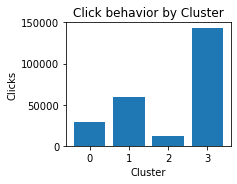

In [59]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)

plt.bar(df['cluster_kmeans4'], df['Clicks'])
plt.xlabel('Cluster')
plt.ylabel('Clicks')
plt.title('Click behavior by Cluster')

Text(0.5, 1.0, 'Spending behavior by Cluster')

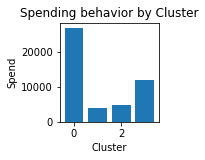

In [60]:
plt.subplot(2,3,2)

plt.bar(df['cluster_kmeans4'], df['Spend'])
plt.xlabel('Cluster')
plt.ylabel('Spend')
plt.title('Spending behavior by Cluster')

Text(0.5, 1.0, 'Revenue behavior by Cluster')

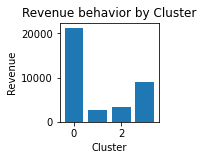

In [61]:
plt.subplot(2,3,3)

plt.bar(df['cluster_kmeans4'], df['Revenue'])
plt.xlabel('Cluster')
plt.ylabel('Revenue')
plt.title('Revenue behavior by Cluster')

Text(0.5, 1.0, 'CPM behavior by Cluster')

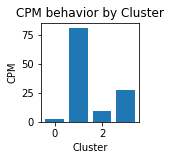

In [62]:
plt.subplot(2,3,4)

plt.bar(df['cluster_kmeans4'], df['CPM'])
plt.xlabel('Cluster')
plt.ylabel('CPM')
plt.title('CPM behavior by Cluster')

Text(0.5, 1.0, 'CTR behavior by Cluster')

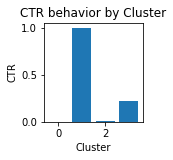

In [63]:
plt.subplot(2,3,5)

plt.bar(df['cluster_kmeans4'], df['CTR'])
plt.xlabel('Cluster')
plt.ylabel('CTR')
plt.title('CTR behavior by Cluster')

Text(0.5, 1.0, 'CPC behavior by Cluster')

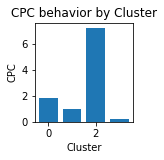

In [64]:
plt.subplot(2,3,6)

plt.bar(df['cluster_kmeans4'], df['CPC'])
plt.xlabel('Cluster')
plt.ylabel('CPC')
plt.title('CPC behavior by Cluster')

In [65]:
# k=3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df_digital_scaled)
df['cluster'] = kmeans.labels_

In [66]:
df.groupby('cluster').agg({'Clicks':'mean', 'Spend':'mean', 'Revenue':'mean', 'CPM':'mean', 'CTR':'mean', 'CPC':'mean'})

,Clicks,Spend,Revenue,CPM,CTR,CPC
cluster,,,,,,
0,13942.094507,1399.529657,966.461980,12.883553,0.135085,0.106388
1,11266.733366,8658.217836,6382.739528,1.564269,0.002171,0.755797
2,3306.695760,1531.950177,998.532943,1.794092,0.004045,0.547640


Text(0.5, 1.0, 'Click behavior by Cluster')

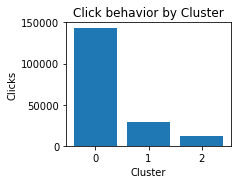

In [67]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)

plt.bar(df['cluster'], df['Clicks'])
plt.xlabel('Cluster')
plt.ylabel('Clicks')
plt.title('Click behavior by Cluster')

Text(0.5, 1.0, 'Spending behavior by Cluster')

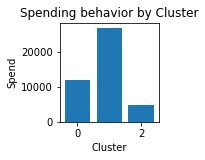

In [68]:
plt.subplot(2,3,2)

plt.bar(df['cluster'], df['Spend'])
plt.xlabel('Cluster')
plt.ylabel('Spend')
plt.title('Spending behavior by Cluster')

Text(0.5, 1.0, 'Revenue behavior by Cluster')

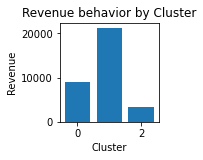

In [69]:
plt.subplot(2,3,3)

plt.bar(df['cluster'], df['Revenue'])
plt.xlabel('Cluster')
plt.ylabel('Revenue')
plt.title('Revenue behavior by Cluster')

Text(0.5, 1.0, 'CPM behavior by Cluster')

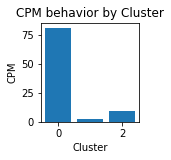

In [70]:
plt.subplot(2,3,4)

plt.bar(df['cluster'], df['CPM'])
plt.xlabel('Cluster')
plt.ylabel('CPM')
plt.title('CPM behavior by Cluster')

Text(0.5, 1.0, 'CTR behavior by Cluster')

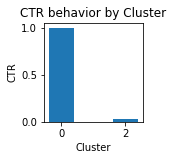

In [71]:
plt.subplot(2,3,5)

plt.bar(df['cluster'], df['CTR'])
plt.xlabel('Cluster')
plt.ylabel('CTR')
plt.title('CTR behavior by Cluster')

Text(0.5, 1.0, 'CPC behavior by Cluster')

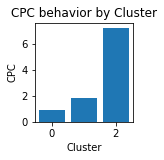

In [72]:
plt.subplot(2,3,6)

plt.bar(df['cluster'], df['CPC'])
plt.xlabel('Cluster')
plt.ylabel('CPC')
plt.title('CPC behavior by Cluster')

_____________________________________________________________

PROBLEM STATEMENT-2

PCA:

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.


## Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [2]:
# reading the data and performing basic analysis
df1=pd.read_excel('PCA India Data_Census.xlsx')

In [3]:
df1.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [4]:
df1.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [5]:
df1.shape

(640, 61)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

There are two object type variables and rest all are integer variables

In [7]:
# checking summary statistic
df1.describe()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.114062,320.500000,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000,13820.946875,20778.392188,6191.807813,...,1392.973438,2757.050000,250.889062,558.098438,560.690625,1293.431250,71.379688,200.742188,510.014063,704.778125
std,9.426486,184.896367,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567,14426.373130,21727.887713,9912.668948,...,1489.707052,2788.776676,453.336594,1117.642748,762.578991,1585.377936,107.897627,309.740854,610.603187,910.209225
min,1.000000,1.000000,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,9.000000,160.750000,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,18.000000,320.500000,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,24.000000,480.250000,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,35.000000,640.000000,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000,103307.000000,156429.000000,96785.000000,...,9875.000000,21611.000000,5775.000000,17153.000000,6116.000000,13714.000000,895.000000,3354.000000,6456.000000,10533.000000


In [8]:
# checking null values
df1.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

There are no missing values in the dataset

In [9]:
# checking for duplicates
df1.duplicated().sum()

0

There are no duplicate values in the dataset

In [10]:
# Drop all the columns other than ones needed for PCA
df1_data = df1.drop(['State Code', 'Dist.Code', 'State', 'Area Name'], axis=1)

In [11]:
df1_data.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478


## Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

for EDA  5 variables considered are No_HH, TOT_M, TOT_F, TOT_WORK_M, TOT_WORK_F.

Univariate Analysis:

plotting histogram and boxplots for the above variables

In [12]:
df1_data.No_HH.describe()

count       640.000000
mean      51222.871875
std       48135.405475
min         350.000000
25%       19484.000000
50%       35837.000000
75%       68892.000000
max      310450.000000
Name: No_HH, dtype: float64

<AxesSubplot:xlabel='No_HH'>

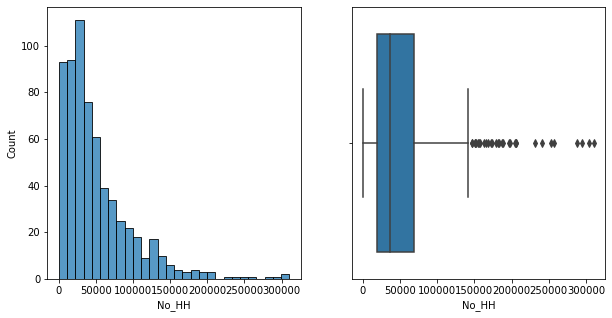

In [14]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df1_data.No_HH, kde=False, ax=axs[0]) 
sns.boxplot(x= 'No_HH', data=df1_data, ax=axs[1]) 

In [15]:
df1_data.TOT_M.describe()

count       640.000000
mean      79940.576563
std       73384.511114
min         391.000000
25%       30228.000000
50%       58339.000000
75%      107918.500000
max      485417.000000
Name: TOT_M, dtype: float64

<AxesSubplot:xlabel='TOT_M'>

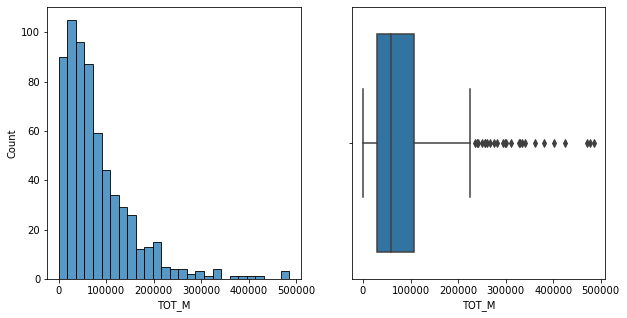

In [16]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df1_data.TOT_M, kde=False, ax=axs[0]) 
sns.boxplot(x= 'TOT_M', data=df1_data, ax=axs[1])

In [17]:
df1_data.TOT_F.describe()

count       640.000000
mean     122372.084375
std      113600.717282
min         698.000000
25%       46517.750000
50%       87724.500000
75%      164251.750000
max      750392.000000
Name: TOT_F, dtype: float64

<AxesSubplot:xlabel='TOT_F'>

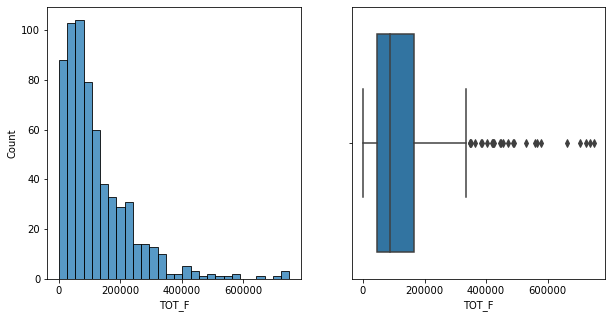

In [18]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df1_data.TOT_F, kde=False, ax=axs[0]) 
sns.boxplot(x= 'TOT_F', data=df1_data, ax=axs[1])

In [19]:
df1_data.TOT_WORK_M.describe()

count       640.000000
mean      37992.407813
std       36419.537491
min         100.000000
25%       13753.500000
50%       27936.500000
75%       50226.750000
max      269422.000000
Name: TOT_WORK_M, dtype: float64

<AxesSubplot:xlabel='TOT_WORK_M'>

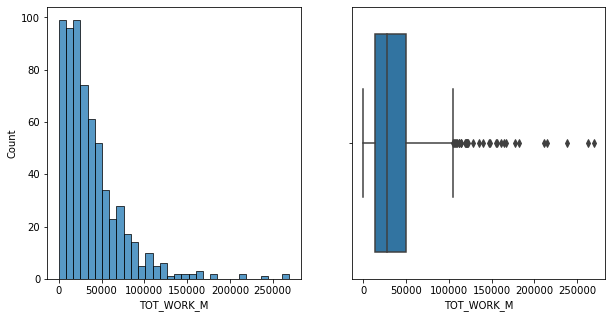

In [20]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df1_data.TOT_WORK_M, kde=False, ax=axs[0]) 
sns.boxplot(x= 'TOT_WORK_M', data=df1_data, ax=axs[1])

In [21]:
df1_data.TOT_WORK_F.describe()

count       640.000000
mean      41295.760938
std       37192.360943
min         357.000000
25%       16097.750000
50%       30588.500000
75%       53234.250000
max      257848.000000
Name: TOT_WORK_F, dtype: float64

<AxesSubplot:xlabel='TOT_WORK_F'>

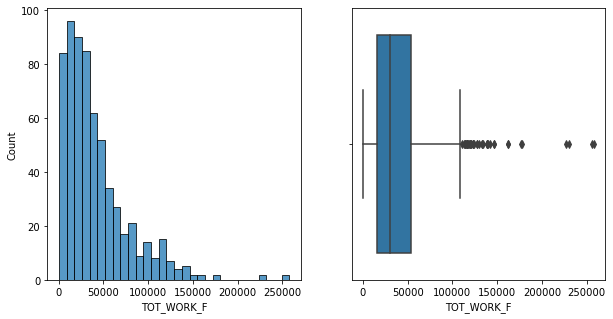

In [22]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df1_data.TOT_WORK_F, kde=False, ax=axs[0]) 
sns.boxplot(x= 'TOT_WORK_F', data=df1_data, ax=axs[1])

We can see by performing univariate analysis that all the EDA variable are right skewed and all of them have outliers.

Bivariate Analysis:

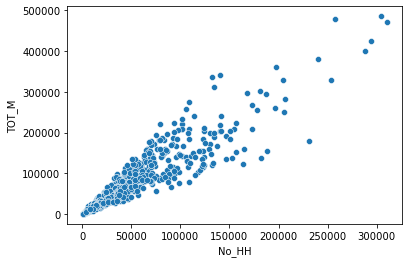

In [23]:
sns.scatterplot(x='No_HH', y='TOT_M', data=df1_data)
plt.ticklabel_format(style='plain', axis='x')

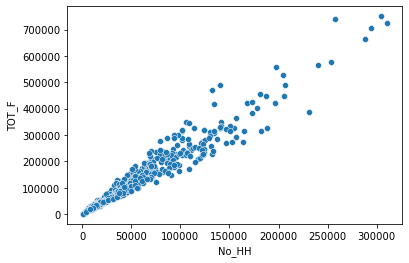

In [24]:
sns.scatterplot(x='No_HH', y='TOT_F', data=df1_data)
plt.ticklabel_format(style='plain', axis='x')

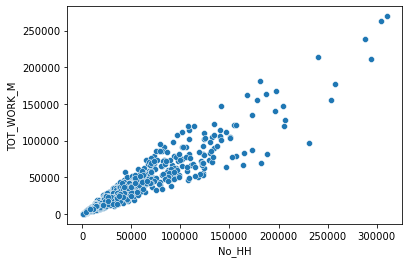

In [25]:
sns.scatterplot(x='No_HH', y='TOT_WORK_M', data=df1_data)
plt.ticklabel_format(style='plain', axis='x')

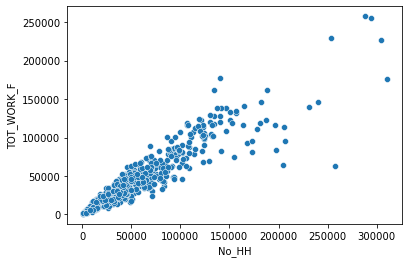

In [26]:
sns.scatterplot(x='No_HH', y='TOT_WORK_F', data=df1_data)
plt.ticklabel_format(style='plain', axis='x')

## Part 2 - PCA: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

It is necessary to treat all the outliers in the data for PCA.

In [83]:
# checking the number of features
len(df1_data.columns)

57

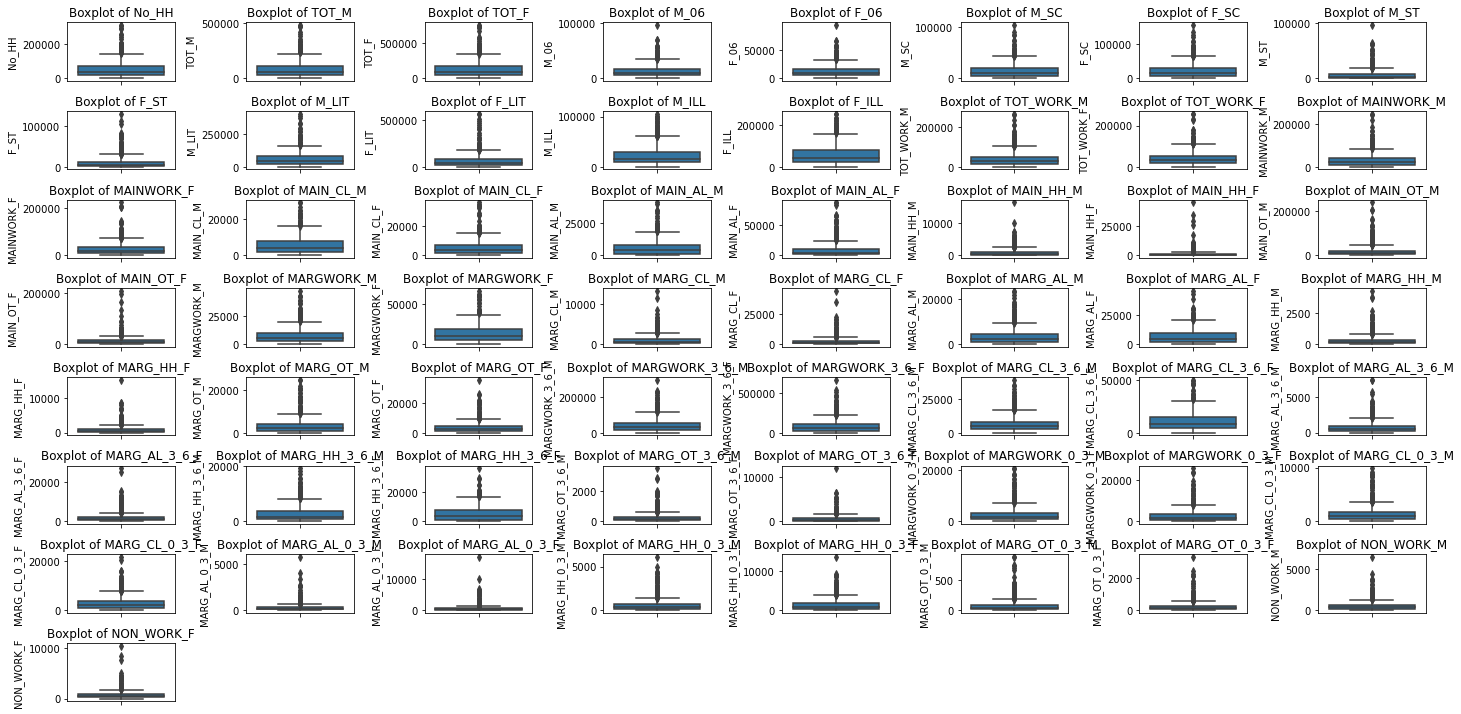

In [84]:
# checking the presense of outliers in each feature
plt.figure(figsize=(20,10))
feature_list1=df1_data.columns
for i in range (len(feature_list1)):
    plt.subplot(8,8, i+1)
    sns.boxplot(y=df1_data[feature_list1[i]], data=df1_data)
    plt.title('Boxplot of {}'. format (feature_list1[i]))
    plt.tight_layout()

We can see that outliers are present in the dataset

## Treatment of Outliers

In [85]:
# define a function which returns the upper and lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [86]:
# Cap and floor the values beyond the outlier boundries
for i in feature_list1:
    LL,UL = remove_outlier(df1_data[i])
    df1_data[i] = np.where(df1_data[i]>UL, UL, df1_data[i])
    df1_data[i] = np.where(df1_data[i]<LL, LL, df1_data[i])

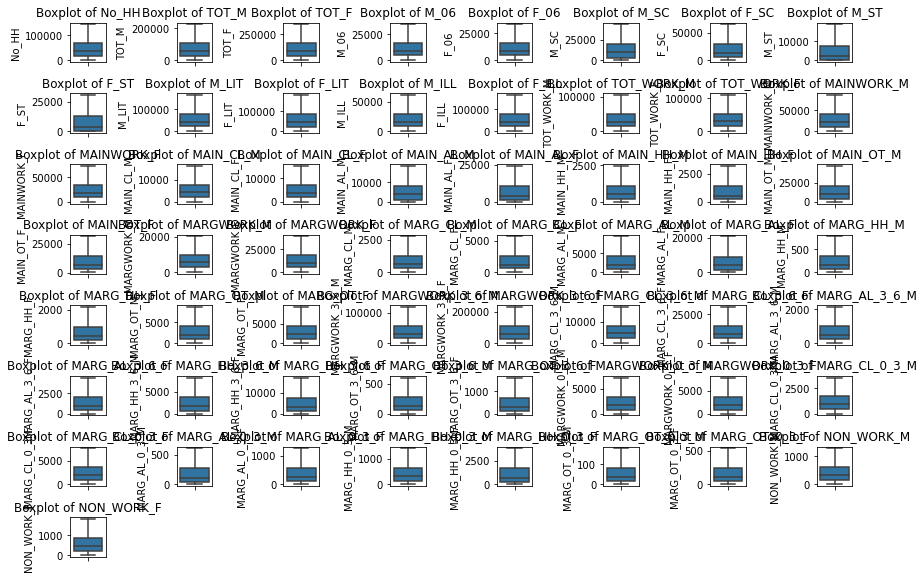

In [87]:
# Check to verify if outliers have been treated
plt.figure(figsize=(12,8))
feature_list1 = df1_data.columns
for i in range (len(feature_list1)):
    plt.subplot(8,8, i+1)
    sns.boxplot(y=df1_data[feature_list1[i]], data=df1_data)
    plt.title('Boxplot of {}'. format (feature_list1[i]))
    plt.tight_layout() 

We can see that the outliers have been treated.

## Part 2 - PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [88]:
df1_data.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707.0,23388.0,29796.0,5862.0,6196.0,3.0,0.0,1999.0,2598.0,13381.0,...,1150.0,749.0,180.0,237.0,680.0,252.0,32.0,46.0,258.0,214.0
1,6218.0,19585.0,23102.0,4482.0,3733.0,7.0,6.0,427.0,517.0,10513.0,...,525.0,715.0,123.0,229.0,186.0,148.0,76.0,178.0,140.0,160.0
2,4452.0,6546.0,10964.0,1082.0,1018.0,3.0,6.0,5806.0,9723.0,4534.0,...,114.0,188.0,44.0,89.0,3.0,34.0,0.0,4.0,67.0,61.0
3,1320.0,2784.0,4206.0,563.0,677.0,0.0,0.0,2666.0,3968.0,1842.0,...,194.0,247.0,61.0,128.0,13.0,50.0,4.0,10.0,116.0,59.0
4,11654.0,20591.0,29981.0,5157.0,4587.0,20.0,33.0,7670.0,10843.0,13243.0,...,874.0,1928.0,465.0,1043.0,205.0,302.0,24.0,105.0,180.0,478.0


In [89]:
# scaling the data using zscore

from scipy.stats import zscore
df1_data_scaled = df1_data.apply(zscore)

In [90]:
df1_data_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.038986,-0.874837,-0.937027,-0.624685,-0.561282,-1.080201,-1.079963,-0.510440,-0.574198,-0.939617,...,-0.093587,-0.860882,-0.041800,-0.423378,0.523468,-0.793688,-0.443385,-0.756991,-0.497493,-0.774865
1,-1.076896,-0.938023,-1.009723,-0.773932,-0.835657,-1.079873,-1.079635,-0.771833,-0.782092,-1.005083,...,-0.719169,-0.877096,-0.347040,-0.443790,-0.634478,-0.884805,0.358782,0.088391,-0.813235,-0.880662
2,-1.121858,-1.154665,-1.141539,-1.141642,-1.138104,-1.080201,-1.079635,0.122588,0.137599,-1.141561,...,-1.130551,-1.128423,-0.770091,-0.800999,-1.063434,-0.984684,-1.026779,-1.025976,-1.008568,-1.074622
3,-1.201599,-1.217171,-1.214930,-1.197772,-1.176091,-1.080447,-1.079963,-0.399531,-0.437333,-1.203009,...,-1.050477,-1.100286,-0.679055,-0.701491,-1.039994,-0.970666,-0.953855,-0.987550,-0.877454,-1.078541
4,-0.938495,-0.921309,-0.935018,-0.700931,-0.740523,-1.078807,-1.078160,0.432534,0.249489,-0.942767,...,-0.369844,-0.298617,1.484398,1.633130,-0.589942,-0.749882,-0.589234,-0.379131,-0.706204,-0.257637


In [91]:
# checking the number of features
len(df1_data_scaled.columns)

57

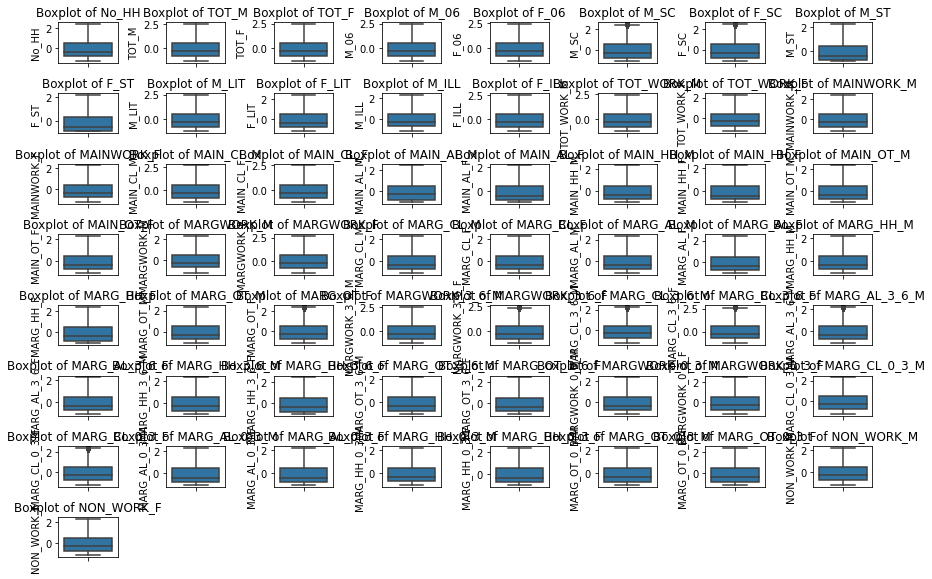

In [92]:
# Boxplot of the scaled data
# checking the presense of outliers in each feature
plt.figure(figsize=(12,8))
feature_list1=df1_data_scaled.columns
for i in range (len(feature_list1)):
    plt.subplot(8,8, i+1)
    sns.boxplot(y=df1_data_scaled[feature_list1[i]], data=df1_data_scaled)
    plt.title('Boxplot of {}'. format (feature_list1[i]))
    plt.tight_layout()

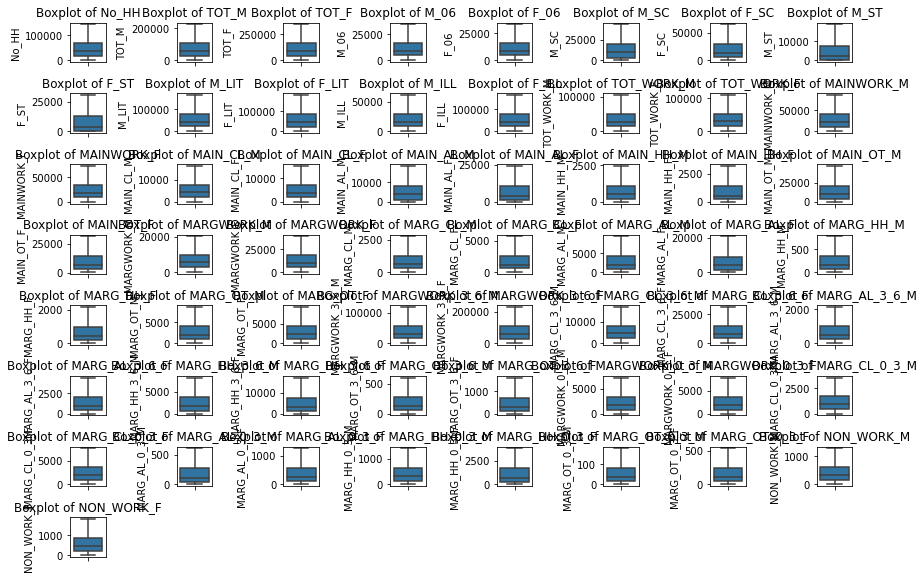

In [93]:
# Boxplot before scaling
plt.figure(figsize=(12,8))
feature_list1 = df1_data.columns
for i in range (len(feature_list1)):
    plt.subplot(8,8, i+1)
    sns.boxplot(y=df1_data[feature_list1[i]], data=df1_data)
    plt.title('Boxplot of {}'. format (feature_list1[i]))
    plt.tight_layout() 

Here we have shown the boxplots of data before and after scaling the data. We can see that there are no outliers in the data.

# Part 2 - PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

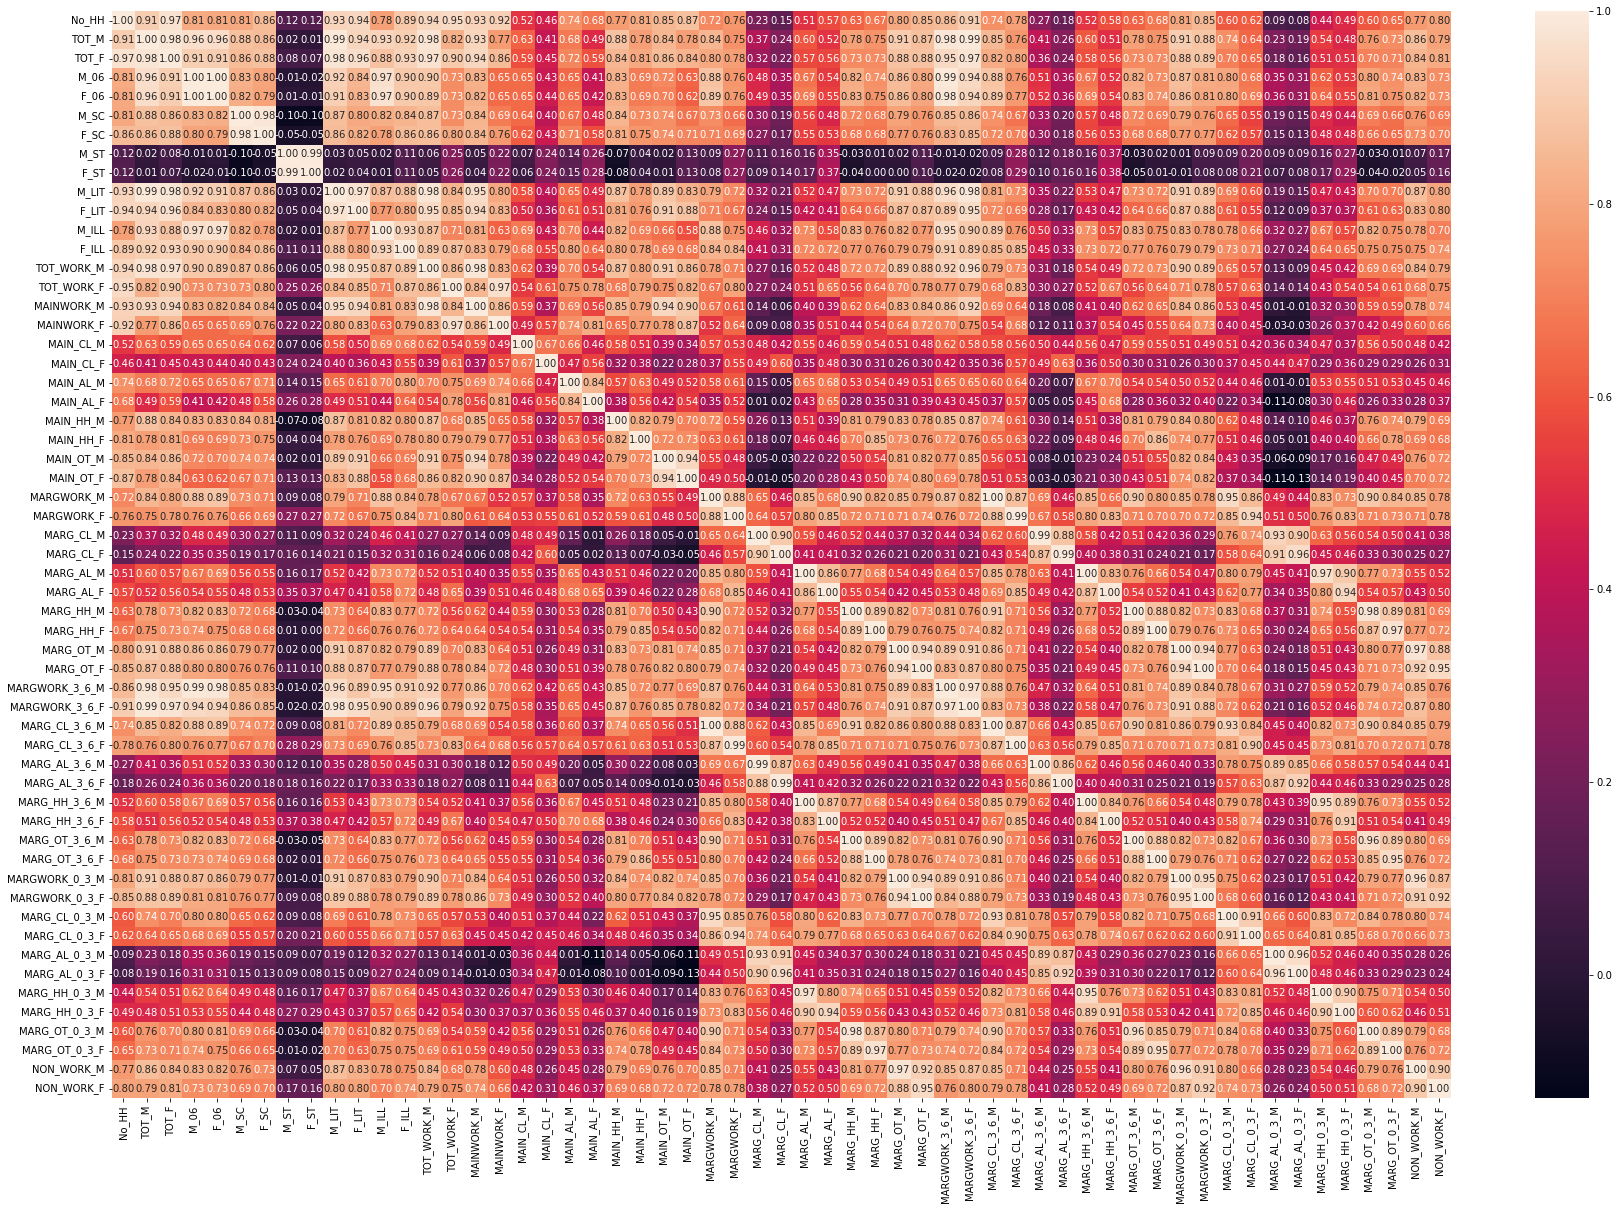

In [94]:
# Check the presence of correlations
plt.figure(figsize=(30,20))
sns.heatmap(df1_data_scaled.corr(), annot=True, fmt='.2f');

In [95]:
# Confirm the statistical significance of correlations
# H0: Correlations are not significant, H1: There are significant correlations
# Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df1_data_scaled)
p_value

0.0

Since here p-value is 0 which is less than 0.05 so we reject the null hypothesis and we can say that there are significant correlation.

In [50]:
# Confirm the adequacy of sample size
#Note:Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df1_data_scaled)
kmo_model

C:\Users\BARKHA\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.9361896166653618

In [96]:
# Apply PCA taking all the features
from sklearn.decomposition import PCA
pca=PCA(n_components=12,random_state=123)
pca_transformed=pca.fit_transform(df1_data_scaled)

In [97]:
# Extract eigen vectors
pca.components_

array([[ 0.14922158,  0.15916917,  0.15820921,  0.15634043,  0.1568144 ,
         0.14335015,  0.14353705,  0.01884873,  0.01787797,  0.15515239,
         0.14544984,  0.1545511 ,  0.15828347,  0.15407627,  0.14252995,
         0.14193201,  0.12573163,  0.11169244,  0.08303496,  0.11929067,
         0.09008881,  0.14184969,  0.13388011,  0.1227618 ,  0.1168656 ,
         0.15665637,  0.14869489,  0.08816344,  0.06516026,  0.1272781 ,
         0.11588826,  0.14536607,  0.14230182,  0.15087675,  0.14801846,
         0.15790761,  0.15583101,  0.15764021,  0.1495015 ,  0.0947852 ,
         0.06715842,  0.12818439,  0.11395923,  0.14510769,  0.14102942,
         0.15092232,  0.14753416,  0.14298675,  0.13378373,  0.06296394,
         0.05674058,  0.11910165,  0.11304417,  0.14213963,  0.14136961,
         0.14762899,  0.14210263],
       [-0.11548673, -0.08023879, -0.09371751, -0.02034061, -0.01431023,
        -0.07966701, -0.08709832,  0.06910144,  0.06731586, -0.10598636,
        -0.13323

These are the coefficients also known as the eigen vectors. Once we have fit PCA, we will be able to extract the components.The components are one of the attributes of PCA.

In [59]:
# Check the eigen values 
# Note: This is always returned in descending order
pca.explained_variance_

array([35.64886379,  7.64357559,  3.76919551,  2.77722349,  1.90694892,
        1.1549031 ,  0.98772671,  0.46462991,  0.39670851,  0.32234683,
        0.27320732,  0.23564734])

In [98]:
 # Check the explained variance for each Principal Component(PC)
# Note: Explained_variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.62444145, 0.13388829, 0.06602291, 0.04864709, 0.03340297,
       0.0202298 , 0.01730146, 0.00813867, 0.00694892, 0.00564637,
       0.00478562, 0.0041277 ])

Here we can see that PC1 alone captures 62.44% of data. so, here we can see that PC1 and PC2 both combine hold 75% of the data which is a very good percentage.

In [100]:
# Creating a dataframe containing the loadings or coefficients of all PCs
df1_extracted_loadings = pd.DataFrame(pca.components_.T,
                                     columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'],
                                     index=df1_data_scaled.columns)

Here we organize all in a dataframe and try to look at it. We will take the transposed form of the dataframe and we will name the columns, the indices here we use in the dataframe will be name of the orignal features.

In [101]:
df1_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
No_HH,0.149222,-0.115487,0.101528,0.076814,-0.012090,0.082558,0.106896,-0.099513,0.026098,0.068129,-0.058620,-0.021775
TOT_M,0.159169,-0.080239,-0.038662,0.052976,-0.042344,0.073667,-0.124085,-0.108870,0.032855,-0.048428,0.029491,-0.047668
TOT_F,0.158209,-0.093718,0.028959,0.070022,-0.022927,0.082812,-0.010291,-0.115276,0.036404,-0.022466,-0.020153,-0.042827
M_06,0.156340,-0.020341,-0.074419,0.028520,-0.080339,0.092379,-0.200807,-0.132945,0.138407,-0.157238,-0.009166,-0.146674
F_06,0.156814,-0.014310,-0.068223,0.016398,-0.078326,0.080010,-0.203411,-0.139343,0.165716,-0.145031,-0.025572,-0.144631
M_SC,0.143350,-0.079667,-0.037619,0.010210,-0.167893,0.050969,-0.040399,0.189169,-0.531743,-0.098456,-0.194630,-0.122621
F_SC,0.143537,-0.087098,0.021350,0.016244,-0.158092,0.054568,0.053990,0.177363,-0.515063,-0.065839,-0.250366,-0.114525
M_ST,0.018849,0.069101,0.323827,0.091143,0.418412,-0.231809,-0.355238,-0.071632,-0.113019,-0.008386,-0.082495,-0.055517
F_ST,0.017878,0.067316,0.338705,0.079554,0.415965,-0.214542,-0.327677,-0.078391,-0.136031,-0.028613,-0.081430,-0.051223
M_LIT,0.155152,-0.105986,-0.032107,0.089187,-0.014033,0.081378,-0.067062,-0.102886,-0.017445,0.000573,0.023821,0.034672


## Part 2 - PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

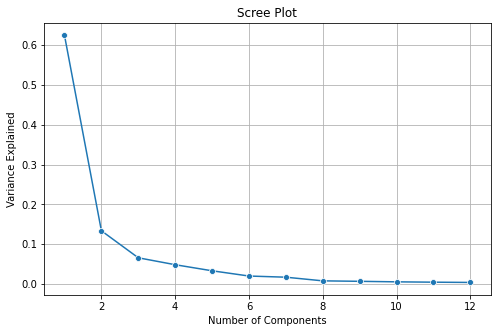

In [66]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,13),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [67]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.62444145, 0.75832974, 0.82435265, 0.87299974, 0.90640271,
       0.92663251, 0.94393397, 0.95207264, 0.95902156, 0.96466793,
       0.96945355, 0.97358126])

We can see that PC1 to PC5 captures 90% of the data, which means that we can drop the rest of the 7 principal components. So, this is the prioritazation that we will be able to achieve.

In [102]:
#Choose the PCs basis cumulative explained variance
df1_selected = df1_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]

In [69]:
#Check the selected PCs
df1_selected

,PC1,PC2,PC3,PC4,PC5
No_HH,0.149222,-0.115487,0.101528,0.076814,-0.012090
TOT_M,0.159169,-0.080239,-0.038662,0.052976,-0.042344
TOT_F,0.158209,-0.093718,0.028959,0.070022,-0.022927
M_06,0.156340,-0.020341,-0.074419,0.028520,-0.080339
F_06,0.156814,-0.014310,-0.068223,0.016398,-0.078326
M_SC,0.143350,-0.079667,-0.037619,0.010210,-0.167893
F_SC,0.143537,-0.087098,0.021350,0.016244,-0.158092
M_ST,0.018849,0.069101,0.323827,0.091143,0.418412
F_ST,0.017878,0.067316,0.338705,0.079554,0.415965
M_LIT,0.155152,-0.105986,-0.032107,0.089187,-0.014033


## Part 2 - PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

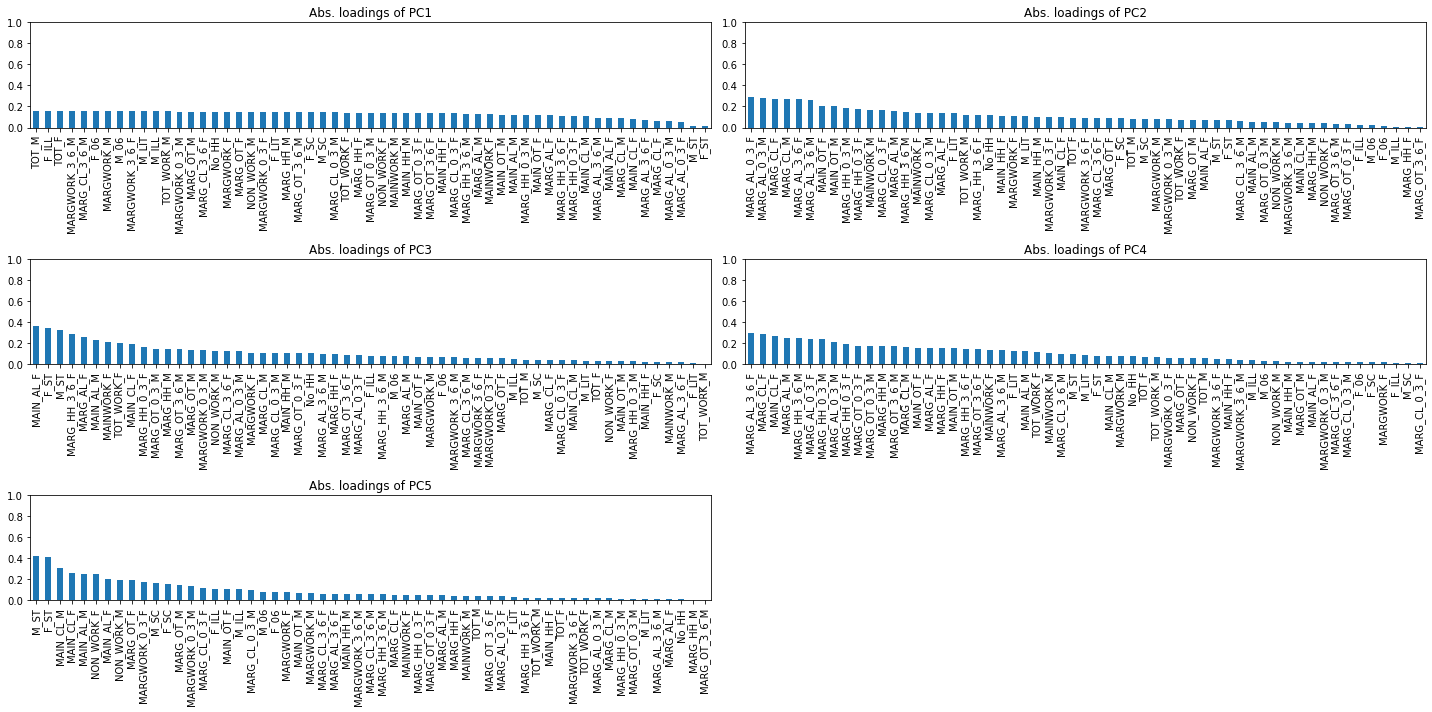

In [104]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (20,10))
for i in range(len(df1_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df1_selected[df1_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df1_selected.columns[i]))
    plt.tight_layout()

Here as we are intrested in the absolute values i.e; the magnitude rather than the positive and the nagative values. Every PC has its own characteristics.

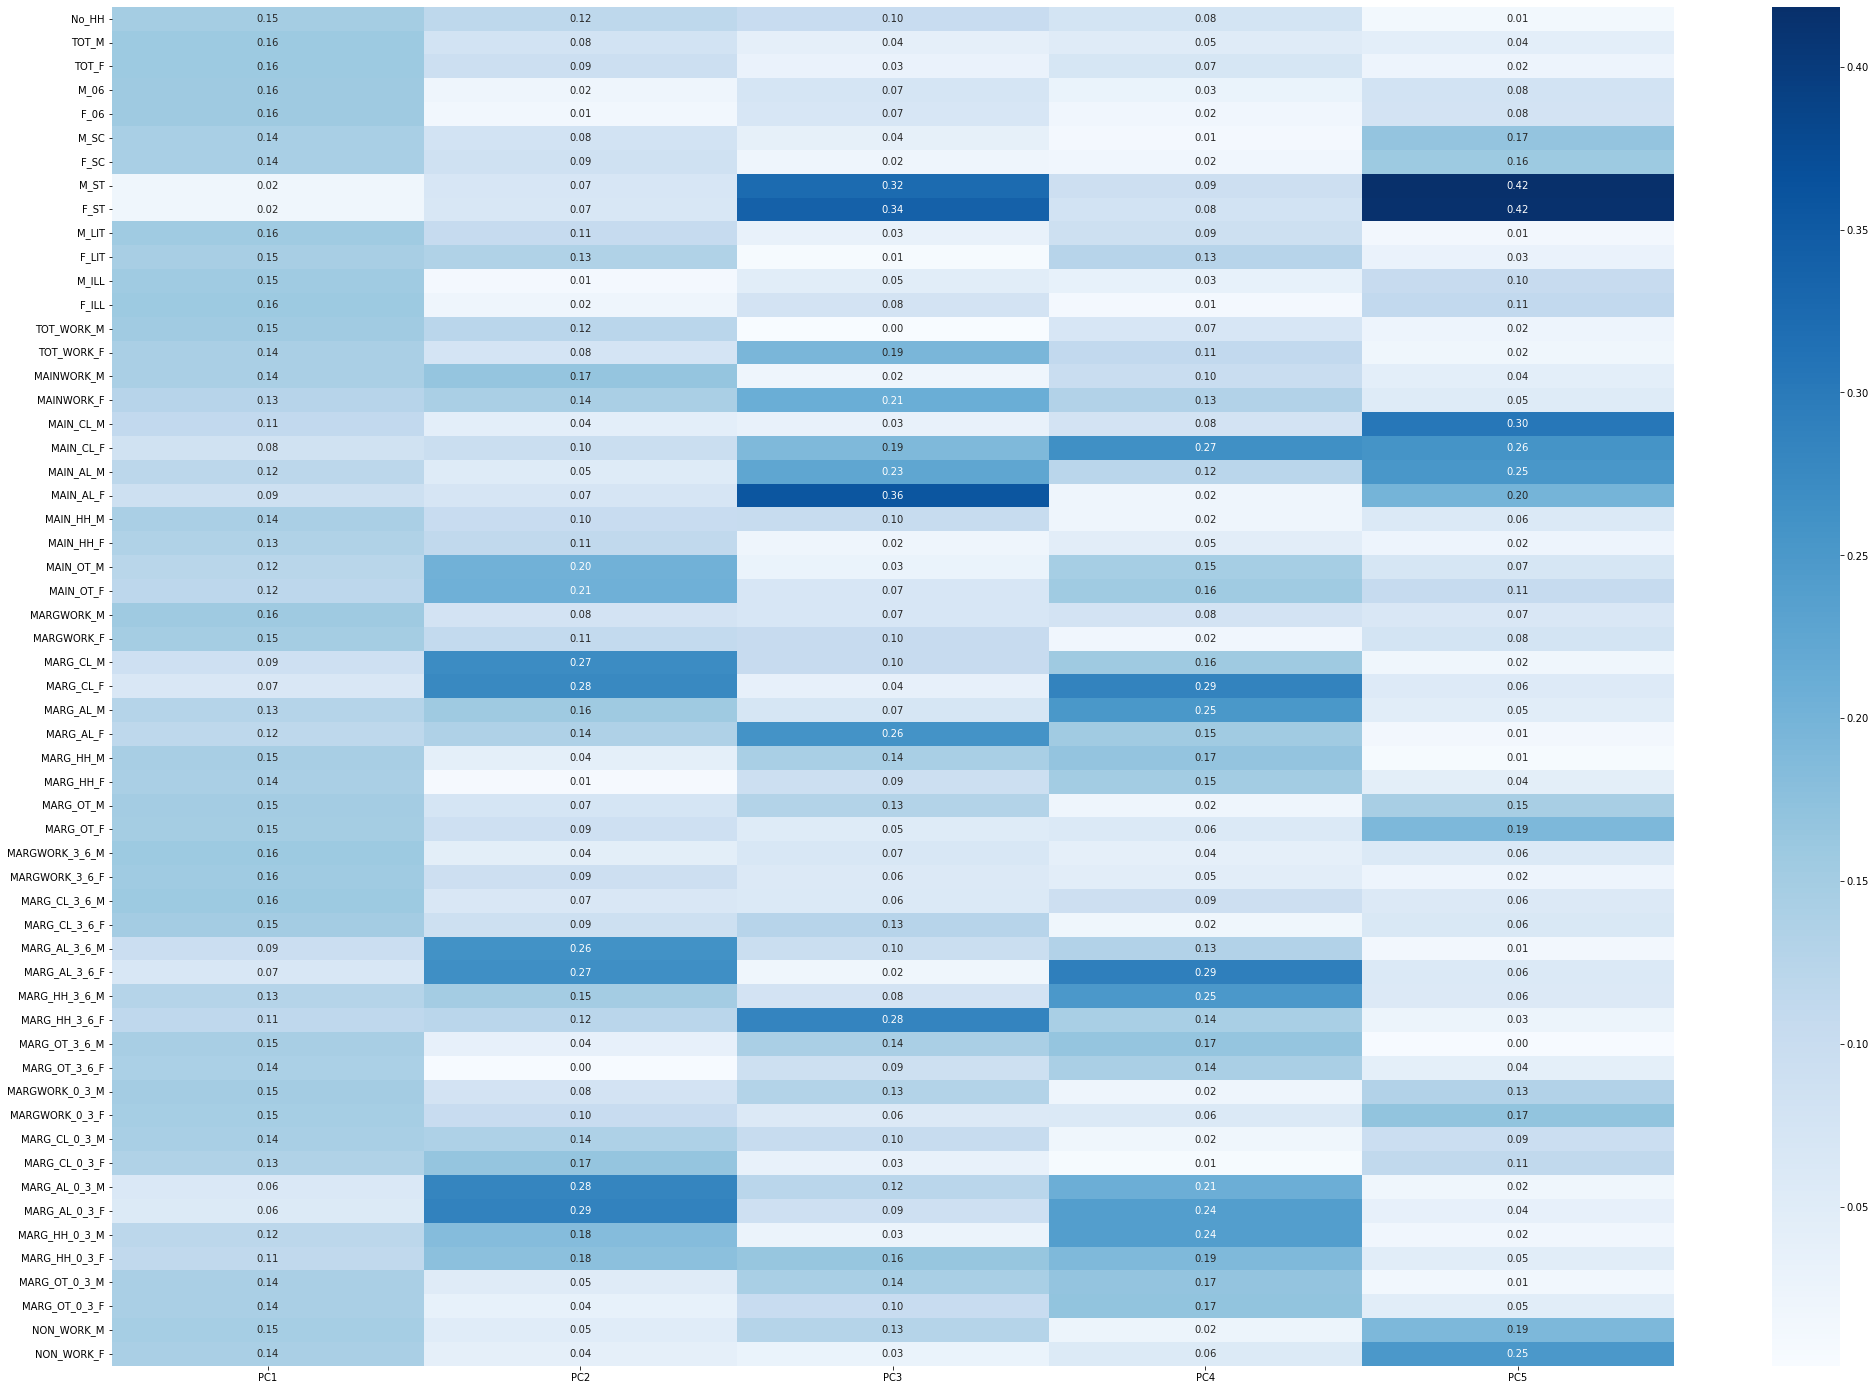

In [105]:
#Compare how the original features influence various PCs
plt.figure(figsize = (35,25))
sns.heatmap(abs(df1_selected), annot = True, cmap = 'Blues',fmt = '.2f');

Here we create a heatmap for the comparison of absolute values of the selected data.

In [73]:
#In order to calculate PC scores we need loadings, below:
df1_selected

,PC1,PC2,PC3,PC4,PC5
No_HH,0.149222,-0.115487,0.101528,0.076814,-0.012090
TOT_M,0.159169,-0.080239,-0.038662,0.052976,-0.042344
TOT_F,0.158209,-0.093718,0.028959,0.070022,-0.022927
M_06,0.156340,-0.020341,-0.074419,0.028520,-0.080339
F_06,0.156814,-0.014310,-0.068223,0.016398,-0.078326
M_SC,0.143350,-0.079667,-0.037619,0.010210,-0.167893
F_SC,0.143537,-0.087098,0.021350,0.016244,-0.158092
M_ST,0.018849,0.069101,0.323827,0.091143,0.418412
F_ST,0.017878,0.067316,0.338705,0.079554,0.415965
M_LIT,0.155152,-0.105986,-0.032107,0.089187,-0.014033


In [77]:
#...and we need the original scaled features
df1_data_scaled.iloc[0]

No_HH            -1.038986
TOT_M            -0.874837
TOT_F            -0.937027
M_06             -0.624685
F_06             -0.561282
M_SC             -1.080201
F_SC             -1.079963
M_ST             -0.510440
F_ST             -0.574198
M_LIT            -0.939617
F_LIT            -0.965904
M_ILL            -0.644588
F_ILL            -0.837035
TOT_WORK_M       -1.012439
TOT_WORK_F       -1.155832
MAINWORK_M       -1.066369
MAINWORK_F       -1.124355
MAIN_CL_M        -1.144964
MAIN_CL_F        -1.180238
MAIN_AL_M        -0.948406
MAIN_AL_F        -0.898818
MAIN_HH_M        -0.917053
MAIN_HH_F        -0.895765
MAIN_OT_M        -0.923768
MAIN_OT_F        -0.989318
MARGWORK_M       -0.570019
MARGWORK_F       -1.039881
MARG_CL_M        -0.347274
MARG_CL_F        -0.759467
MARG_AL_M        -0.331878
MARG_AL_F        -0.934181
MARG_HH_M        -0.465296
MARG_HH_F        -0.661238
MARG_OT_M        -0.665594
MARG_OT_F        -0.797562
MARGWORK_3_6_M   -0.731300
MARGWORK_3_6_F   -0.787295
M

Here we taken first row of the scaled data that we saw above x1, x2 x3... values and do a dot product.

In [106]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in df1_selected.columns:
    pc_score = np.dot(df1_selected[i], df1_data_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

-5.528161 0.430378 -1.473827 -1.278049 0.376358 

In [107]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=5, random_state=123)
pca_final = pca.fit_transform(df1_data_scaled)

In the above step we taken the number of components as 5 instead of 12, which is the shortlisted number of principal components and do a fit transform on the data.

In [108]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 78 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = df1_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5
0,-5.528161,0.430378,-1.473827,-1.278049,0.376358
1,-5.492016,-0.106110,-2.015641,-1.750168,-0.006857
2,-7.474643,-0.217194,-0.247428,0.006079,0.556282
3,-7.919737,-0.652311,-0.659220,-0.735550,0.272465
4,-5.175695,2.304059,-1.157327,1.060796,1.080249
5,-3.647563,4.598733,-1.742810,3.301079,1.212639
6,-6.178820,-0.256962,-1.234310,-0.121392,-0.173580
7,-5.436802,0.237215,-1.664352,-1.163284,0.220704
8,-6.099449,0.004985,-1.563508,-1.537818,0.364566
9,-4.972562,-1.970847,-1.707058,-0.676605,0.614131


This data which we got above should not have any kind of correlation. Let's create a heatmap below.

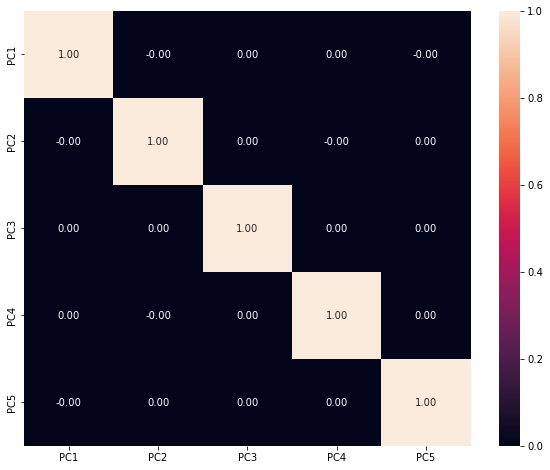

In [109]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

So, here we can see that we do not have any correlation in the variables.

## Part 2 - PCA: Write linear equation for first PC.

PC1 = a1x1 + a2x2 + a3X3 +a4X4 + …….+ a57x57